In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Rectangle
from matplotlib_venn import venn2
from matplotlib_venn._common import VennDiagram
from netZooPy.panda import Panda
from sponge import Sponge
from sponge.modules.analysis import load_prior, compare_priors
from typing import Optional, Tuple

%matplotlib inline

### Figure S1

The figure shows the differences the networks that PANDA generates with
and without prior networks.

The input files for this run of PANDA are the gene expression file for 
a subset of human breast cancer patients from TCGA 
(`tcga_brc_expression.tsv`) and optionally the priors generated by 
SPONGE using the default settings, accessible 
[here](https://doi.org/10.5281/zenodo.15063580).

In [ ]:
# !wget https://zenodo.org/records/15063580/files/motif_prior_names_2024.tsv?download=1 -O ../data/motif_prior_names_2024.tsv
# !wget https://zenodo.org/records/15063580/files/ppi_prior_2024.tsv?download=1 -O ../data/ppi_prior_2024.tsv

In [ ]:
# PANDA with the prior networks
panda_prior = Panda(
    expression_file='../data/tcga_brc_expression.tsv',
    motif_file='../data/motif_prior_names_2024.tsv',
    ppi_file='../data/ppi_prior_2024.tsv',
    modeProcess='intersection',
)

Loading motif data ...
  Elapsed time: 5.13 sec.
Loading expression data ...
  Elapsed time: 0.09 sec.
Loading PPI data ...
Number of PPIs: 1778
  Elapsed time: 0.02 sec.
Calculating coexpression network ...


/fp/homes01/u01/ec-ladislah/.conda/envs/sponge_dev/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/fp/homes01/u01/ec-ladislah/.conda/envs/sponge_dev/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  Elapsed time: 5.64 sec.
Creating motif network ...
  Elapsed time: 7.66 sec.
Creating PPI network ...
  Elapsed time: 0.00 sec.
intersection motif_prior_names_2024.tsv tcga_brc_expression.tsv ppi_prior_2024.tsv True False False
Normalizing networks ...
  Elapsed time: 16.38 sec.
Clearing motif and ppi data, unique tfs, and gene names for speed
 Pass as_adjacency to save the output panda as adjacency matrix
Running PANDA algorithm ...
Computing panda on CPU
step: 0, hamming: 2.8955320789605747
step: 1, hamming: 0.6420090997918797
step: 2, hamming: 0.5235461861916587
step: 3, hamming: 0.474788709037545
step: 4, hamming: 0.43758479213568924
step: 5, hamming: 0.40208171171223317
step: 6, hamming: 0.36637600795617364
step: 7, hamming: 0.330618336520645
step: 8, hamming: 0.29550676067365406
step: 9, hamming: 0.2617821869004416
step: 10, hamming: 0.23004483044581106
step: 11, hamming: 0.20070669085974044
step: 12, hamming: 0.173997557789596
step: 13, hamming: 0.14999541233181335
step: 14, h

In [ ]:
# PANDA without the prior networks
panda_corr = Panda(
    expression_file='../data/tcga_brc_expression.tsv',
    motif_file=None,
    ppi_file=None,
    modeProcess='intersection',
)

Loading expression data ...
  Elapsed time: 0.08 sec.
No PPI data given: ppi matrix will be an identity matrix of size 0
Calculating coexpression network ...


/fp/homes01/u01/ec-ladislah/.conda/envs/sponge_dev/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/fp/homes01/u01/ec-ladislah/.conda/envs/sponge_dev/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  Elapsed time: 5.49 sec.
Returning the correlation matrix of expression data in <Panda_obj>.correlation_matrix
intersection None tcga_brc_expression.tsv None True False False


In [4]:
df_prior = panda_prior.panda_network
df_corr = panda_corr.panda_network

In [5]:
df_prior.shape

(442, 21602)

In [6]:
df_corr.shape

(21602, 21602)

In [111]:
def plot_network(
    df: pd.DataFrame,
    ax: plt.Axes,
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
    n_shown: int = 5,
) -> None:
    
    mappable = ax.imshow(df.iloc[:n_shown, :n_shown], cmap='coolwarm',
        vmin=vmin, vmax=vmax)
    cb = plt.colorbar(mappable, fraction=0.05, drawedges=False, shrink=0.9)
    cb.outline.set_visible(False)
    for row in range(n_shown):
        for col in range(n_shown):
            ax.text(col, row, '{:.2f}'.format(df.iloc[row, col]),
                ha='center', va='center', size=12)
    ax.set_yticks(range(n_shown))
    ax.set_yticklabels(df.index[:n_shown], fontsize=12)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xticks(range(n_shown))
    ax.set_xticklabels(df.columns[:n_shown], fontsize=12)
    ax.tick_params(length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

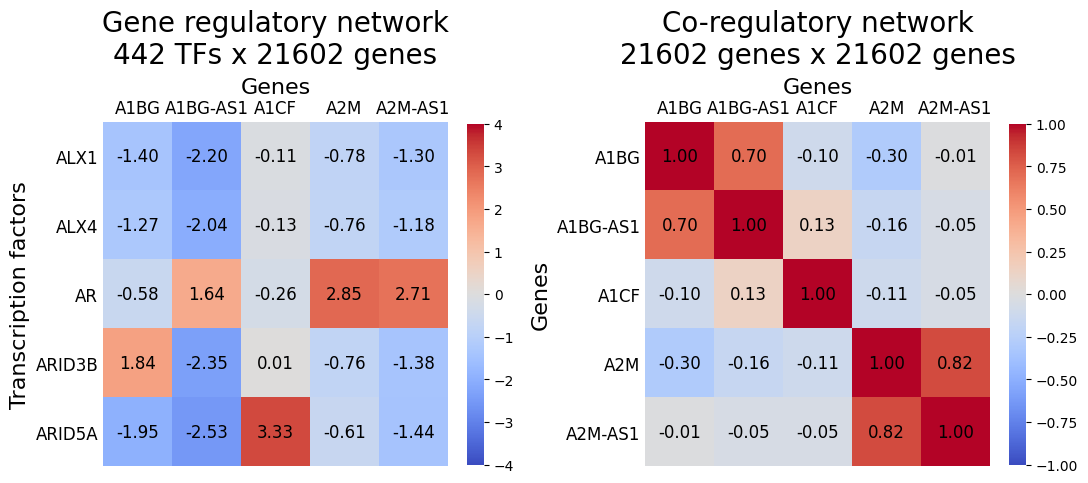

In [ ]:
fig_s1,ax_s1 = plt.subplots(nrows=1, ncols=2, figsize=(11,5),
    tight_layout=True)

plot_network(df_prior, ax_s1[0], vmin=-4, vmax=4)
ax_s1[0].set_title('Gene regulatory network\n442 TFs x 21602 genes',
    size=20, pad=10)
ax_s1[0].set_ylabel('Transcription factors', size=16)
ax_s1[0].set_xlabel('Genes', size=16)

plot_network(df_corr, ax_s1[1], vmin=-1, vmax=1)
ax_s1[1].set_title('Co-regulatory network\n21602 genes x 21602 genes',
    size=20, pad=10)
ax_s1[1].set_ylabel('Genes', size=16)
ax_s1[1].set_xlabel('Genes', size=16)

fig_s1.savefig('../figures/fig_s1.svg', dpi=300, bbox_inches='tight')

### Figure S2

For subfigure A, see further down - B is generated first.

Subfigure B shows the correspondence between the SPONGE motif prior and an older motif prior generated using FIMO.

The SPONGE motif prior was generated using default settings, you can download it [here](https://doi.org/10.5281/zenodo.15063580).

The FIMO motif prior can be found [online](https://sites.google.com/a/channing.harvard.edu/kimberlyglass/tools/resources). 
Here are the direct links to the [prior network](https://drive.google.com/file/d/1Wmw64hZOIoIrdeE2XjUulmbFp2RArcFa/view?usp=sharing)
and the [motif information](https://drive.google.com/file/d/1MlPiAmOxu4mTd4nW9zMygzK1U9F8XB0M/view?usp=sharing).
They can also be downloaded using gdown as below:

In [ ]:
# !wget https://zenodo.org/records/15063580/files/motif_prior_names_2024.tsv?download=1 -O ../data/motif_prior_names_2024.tsv

--2025-04-11 10:40:24--  https://zenodo.org/records/13628785/files/motif_prior_names_2024.tsv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158563371 (151M) [application/octet-stream]
Saving to: ‘../data/motif_prior_names_2024.tsv’

../data/motif_prior 100%[===================>] 151.22M  23.0MB/s    in 30s     

2025-04-11 10:40:53 (5.11 MB/s) - ‘../data/motif_prior_names_2024.tsv’ saved [158563371/158563371]



In [ ]:
# import gdown

# id_prior = '1Wmw64hZOIoIrdeE2XjUulmbFp2RArcFa'
# output_prior = '../data/fimo_motif_prior.tsv'
# gdown.download(id=id_prior, output=output_prior, fuzzy=True)

# id_info = '1MlPiAmOxu4mTd4nW9zMygzK1U9F8XB0M'
# output_info = '../data/fimo_motif_info.tsv'
# gdown.download(id=id_info, output=output_info, fuzzy=True)

In [3]:
sponge_prior = load_prior('motif_prior_names_2024.tsv')

In [ ]:
fimo_prior = load_prior('../data/fimo_motif_prior.tsv')

We attempt to match the FIMO prior motifs to the respective TF names for comparison.

In [ ]:
fimo_motifs = pd.read_table('../data/fimo_motif_info.tsv')
# Replace with base IDs
fimo_motifs['base_id'] = fimo_motifs['MotifID'].apply(
    lambda x: x.split('_')[0]
)
fimo_motifs.set_index('base_id', inplace=True)
# Parse non-human TF names
fimo_motifs['parsed_info'] = fimo_motifs['TF_Info'].apply(
    lambda x: x.split(')')[0][1:] if ')' in x else x
)
# Check there are no duplicates
assert len(fimo_motifs[fimo_motifs['parsed_info'].duplicated()]) == 0
# Create a dictionary for fast mapping
tf_mapping = {base: info for base,info in fimo_motifs['parsed_info'].items()}

In [6]:
fimo_prior['tf'] = fimo_prior['tf'].apply(lambda x: tf_mapping[x])

Statistics for the first prior:
Number of unique TFs: 730
Number of unique genes: 37937
Number of edges: 7400777
Network density: 26.72 %

Statistics for the second prior:
Number of unique TFs: 646
Number of unique genes: 77077
Number of edges: 11698461
Network density: 23.49 %

Number of common TFs: 526
Number of common genes: 23161

Network density in common TF/genes for the first prior: 30.92 %
Network density in common TF/genes for the second prior: 25.02 %

              precision    recall  f1-score   support

           0       0.77      0.84      0.81   8416362
           1       0.56      0.45      0.50   3766324

    accuracy                           0.72  12182686
   macro avg       0.67      0.65      0.65  12182686
weighted avg       0.71      0.72      0.71  12182686



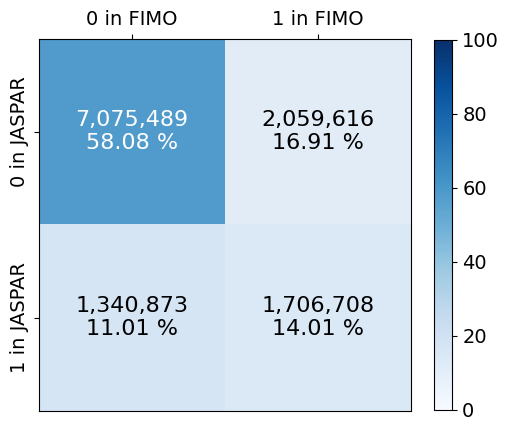

In [ ]:
ax_s2b = compare_priors(fimo_prior, sponge_prior)
ax_s2b.set_xticklabels([f'{x} in FIMO' for x in '01'])
ax_s2b.set_yticklabels([f'{x} in JASPAR' for x in '01'])

ax_s2b.get_figure().savefig('../figures/fig_s2b.svg', dpi=300,
    bbox_inches='tight')

Subfigure A shows the overlap between the transcription factors and genes present in two priors.

In [8]:
# Statistics from above (n_tf, n_genes)
stats_fimo = (730, 37937)
stats_jaspar = (646, 77077)
stats_common = (526, 23161)

In [9]:
def plot_venn(
    stats = Tuple[int],
    ax = plt.Axes,
) -> VennDiagram:
    
    vd = venn2(
        subsets=[stats[0] - stats[2],
            stats[1] - stats[2],
            stats[2]],
        set_colors=['C0', 'C1'],
        set_labels=None,
        ax=ax,
    )
    for label in ['10', '01', '11']:
        vd.get_label_by_id(label).set(size=14)

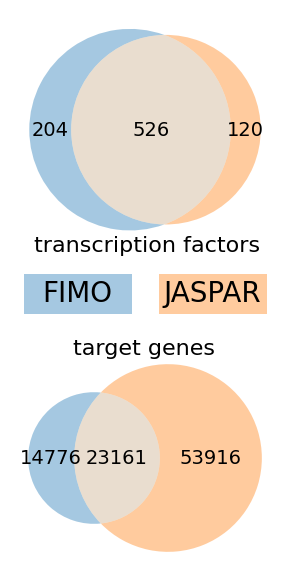

In [ ]:
fig_s2a,ax_s2a = plt.subplots(nrows=3, ncols=1, height_ratios=(6,1,6),
    figsize=(3,6), tight_layout=True)
# TF Venn diagram
v_tfs = plot_venn(
    stats=[x[0] for x in (stats_fimo, stats_jaspar, stats_common)],
    ax=ax_s2a[0]
)
ax_s2a[0].text(0, -0.6, 'transcription factors', ha='center', va='center',
    size=16)
# Gene Venn diagram
v_genes = plot_venn(
    stats=[x[1] for x in (stats_fimo, stats_jaspar, stats_common)],
    ax=ax_s2a[2]
)
ax_s2a[2].text(0, 0.6, 'target genes', ha='center', va='center', size=16)
# Legend rectangles
ax_s2a[1].set_axis_off()
ax_s2a[1].add_patch(Rectangle((0.05,0), 0.4, 1, color='C0', alpha=0.4, lw=0))
ax_s2a[1].add_patch(Rectangle((0.55,0), 0.4, 1, color='C1', alpha=0.4, lw=0))
ax_s2a[1].text(0.25, 0.5, 'FIMO', ha='center', va='center', size=20)
ax_s2a[1].text(0.75, 0.5, 'JASPAR', ha='center', va='center', size=20)

fig_s2a.savefig('../figures/fig_s2a.svg', dpi=300, bbox_inches='tight')